In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df

,Sentence,Preprocessed_Sentence
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sales doubled eurm...
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...
...,...,...
2813,"$IFF technical alerts: Stochastic Sell Signal,...",iff technical alerts stochastic sell signal dm...
2814,On the basis of competitive bidding OOO Kitai ...,basis competitive bidding ooo kitai stroi russ...
2815,British American Tobacco drops and sues PwC ov...,british american tobacco drops sues pwc pollut...
2816,The group posted net sales of 35.3 mln euro $ ...,group posted net sales mln euro mln operating ...


In [3]:
df = df.drop(columns=['Sentence'])
df

,Preprocessed_Sentence
0,geosolutions technology leverage benefon gps s...
1,esi lows bk real possibility
2,last quarter componenta net sales doubled eurm...
3,according finnishrussian chamber commerce majo...
4,swedish buyout firm sold remaining percent sta...
...,...
2813,iff technical alerts stochastic sell signal dm...
2814,basis competitive bidding ooo kitai stroi russ...
2815,british american tobacco drops sues pwc pollut...
2816,group posted net sales mln euro mln operating ...


In [4]:
df.rename(columns={'Preprocessed_Sentence': 'Sentence'}, inplace=True)


In [5]:
sentences = df['Sentence'].tolist()
print(sentences)

['geosolutions technology leverage benefon gps solutions providing location based search technology communities platform location relevant multimedia content new powerful commercial model', 'esi lows bk real possibility', 'last quarter componenta net sales doubled eurm eurm period year earlier moved zero pretax profit pretax loss eurm', 'according finnishrussian chamber commerce major construction companies finland operating russia', 'swedish buyout firm sold remaining percent stake almost eighteen months taking company public finland', 'spy wouldnt surprised see green close', 'shells billion bg deal meets shareholder skepticism', 'ssh communications security corp stock exchange release october pm company updates full year outlook estimates results remain loss full year', 'kone net sales rose yearonyear first nine months', 'stockmann department store total floor space square metres stockmann investment project price tag eur million', 'circulation revenue increased finland sweden', 'sap

In [6]:
df.dropna(subset=['Sentence'], inplace=True)


In [7]:
df['Sentence'].fillna('', inplace=True)


In [8]:
sentences = df['Sentence']
print(sentences)

0       geosolutions technology leverage benefon gps s...
1                            esi lows bk real possibility
2       last quarter componenta net sales doubled eurm...
3       according finnishrussian chamber commerce majo...
4       swedish buyout firm sold remaining percent sta...
                              ...                        
2813    iff technical alerts stochastic sell signal dm...
2814    basis competitive bidding ooo kitai stroi russ...
2815    british american tobacco drops sues pwc pollut...
2816    group posted net sales mln euro mln operating ...
2817    clothing retail chain seppñlñ sales increased ...
Name: Sentence, Length: 2817, dtype: object


In [9]:
tfidf_vectorizer = TfidfVectorizer()   #Term Frequency-Inverse Document Frequency.
#TF= No. of repeated words in a sentences/no. of words in a sentence
#IDF= log(No. of sentences/No. ofsentences containig the word)
#TF_IDF = TF*IDF
# we get to know the word having more importance 

# Fit and transform the sentences
tfidf_vectors = tfidf_vectorizer.fit_transform(sentences).toarray()

In [10]:
tfidf_vectors.shape

(2817, 6959)

In [11]:
#principal componenent analysis
pca = PCA(n_components=3)   #This means we want to reduce the dimensionality of the data to three dimensions and it
#does not change the number of observations.
tfidf_vectors_pca = pca.fit_transform(tfidf_vectors)

#fit_transform() method of the PCA object to both fit the PCA model to the TF-IDF vectors and 
#transform them into the reduced-dimensional space


In [12]:
tfidf_vectors_pca

array([[-0.07418429, -0.03769002,  0.01134374],
       [-0.06754931, -0.03320638,  0.00343717],
       [ 0.07671874,  0.14588856,  0.06183501],
       ...,
       [-0.06743625, -0.03430583,  0.00359525],
       [ 0.05921838,  0.46319221,  0.58591713],
       [ 0.58452721, -0.12807591,  0.05314671]])

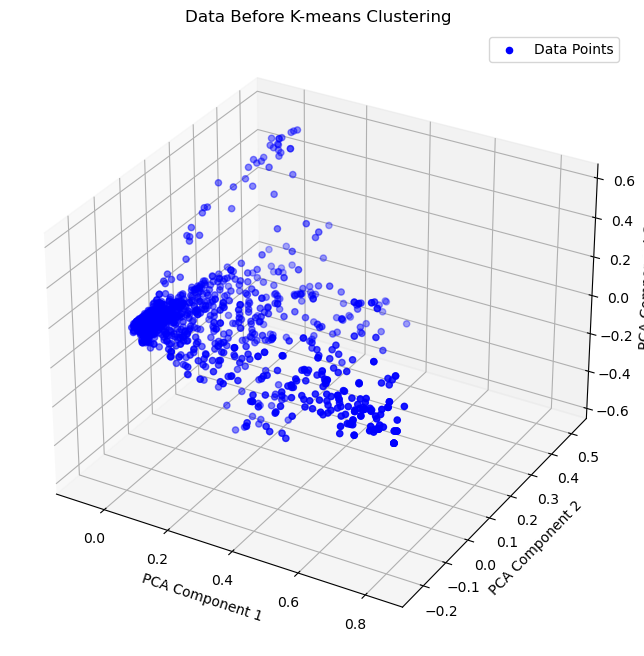

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = tfidf_vectors_pca[:, 0]  # extract the first three principal components from the tfidf_vectors_pca array.
y = tfidf_vectors_pca[:, 1]
z = tfidf_vectors_pca[:, 2]

ax.scatter(x, y, z, c='blue', marker='o', label='Data Points')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Data Before K-means Clustering')
ax.legend()
plt.show()

****************distance between data point and cluster********************

In [14]:
def compute_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

*****************assign each data point to their closest centroid, which will form the predefined cluster***************

In [15]:
def assign_clusters(centroids, data):
    clusters = []
    for point in data:
        distances = [compute_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


 *********** re-initialize the centroids by calculating the average of all data points of that cluster.************

In [16]:
def update_centroids(clusters, data, k):
    centroids = []                   #updated new mean wale centroids
    for i in range(k):
        cluster_points = data[clusters == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

************place a new centroid to each cluster**************

In [17]:
def kmeans(data, k, max_iters=100):
    centroids = data[np.random.choice(len(data), k, replace=False)]
    for iteration in range(max_iters):
        clusters = assign_clusters(centroids, data)
        new_centroids = update_centroids(clusters, data, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids                      

    

*********select the value of k , to decide the number of clusters*************

In [18]:
k_values = range(1,10)
#you want to avoid choosing an excessively large number of clusters, as it 
#can lead to overfitting and less interpretable results.

wcss_values = []

'''Within-Cluster Sum of Squares (WCSS) for each value of k. WCSS is a measure of the compactness 
of the clusters, and it tends to decrease as the number of clusters increases. The goal is often to find the value of
k where the rate of decrease in WCSS slows down significantly, indicating an optimal number of clusters.'''

for k in k_values:
    clusters, centroids = kmeans(tfidf_vectors, k)
    wcss_values.append(np.sum((tfidf_vectors - centroids[clusters])**2))
    #Sum up these squared distances for all clusters to obtain the total Within-Cluster Sum of Squares.



In [19]:
# Print new centroid values after each iteration
for k in k_values:
    print(f"Centroid values for k={k}:")
    clusters, centroids = kmeans(tfidf_vectors, k)
    for i, centroid in enumerate(centroids):
        print(f"Cluster {i + 1}: {centroid}")
    print()

Centroid values for k=1:
Cluster 1: [0.0001087  0.00010148 0.00429601 ... 0.00010661 0.00014927 0.00027758]

Centroid values for k=2:
Cluster 1: [0. 0. 0. ... 0. 0. 0.]
Cluster 2: [0.0001205  0.00011251 0.00476264 ... 0.00011819 0.00016548 0.00030773]

Centroid values for k=3:
Cluster 1: [0. 0. 0. ... 0. 0. 0.]
Cluster 2: [0.00013354 0.00012468 0.00527774 ... 0.00013097 0.00018338 0.00034101]
Cluster 3: [0. 0. 0. ... 0. 0. 0.]

Centroid values for k=4:
Cluster 1: [0.00013609 0.00012706 0.         ... 0.00013348 0.00018688 0.00034753]
Cluster 2: [0.         0.         0.27504241 ... 0.         0.         0.        ]
Cluster 3: [0. 0. 0. ... 0. 0. 0.]
Cluster 4: [0. 0. 0. ... 0. 0. 0.]

Centroid values for k=5:
Cluster 1: [0.00014922 0.00013932 0.0058976  ... 0.00014636 0.00020492 0.00038106]
Cluster 2: [0. 0. 0. ... 0. 0. 0.]
Cluster 3: [0. 0. 0. ... 0. 0. 0.]
Cluster 4: [0. 0. 0. ... 0. 0. 0.]
Cluster 5: [0. 0. 0. ... 0. 0. 0.]

Centroid values for k=6:
Cluster 1: [0.00014735 0.0001375

In [20]:
wcss_values

[2787.262835903742,
 2720.2039732021617,
 2696.175908365444,
 2693.172777760293,
 2674.59262687874,
 2671.4175289460504,
 2663.1852065236058,
 2664.3828013082652,
 2657.2667958534994]

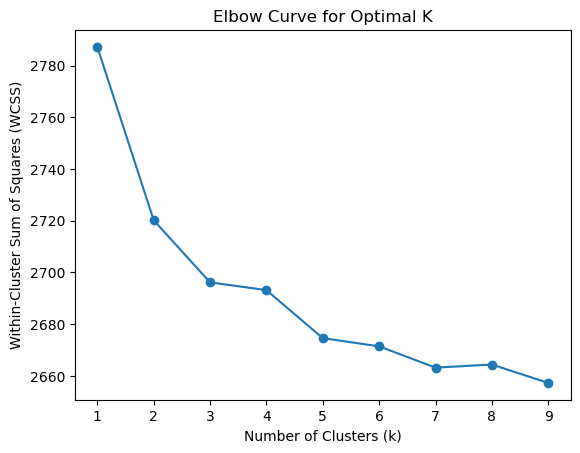

In [21]:
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [22]:
optimal_k = 5

# Perform K-means clustering for the optimal k
clusters, centroids = kmeans(tfidf_vectors, optimal_k)

In [23]:
clusters

array([3, 0, 0, ..., 0, 0, 4], dtype=int64)

In [24]:
centroids

array([[0.00015841, 0.00014789, 0.00551363, ..., 0.00015537, 0.00021753,
        0.00040452],
       [0.        , 0.        , 0.00274436, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00409806, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

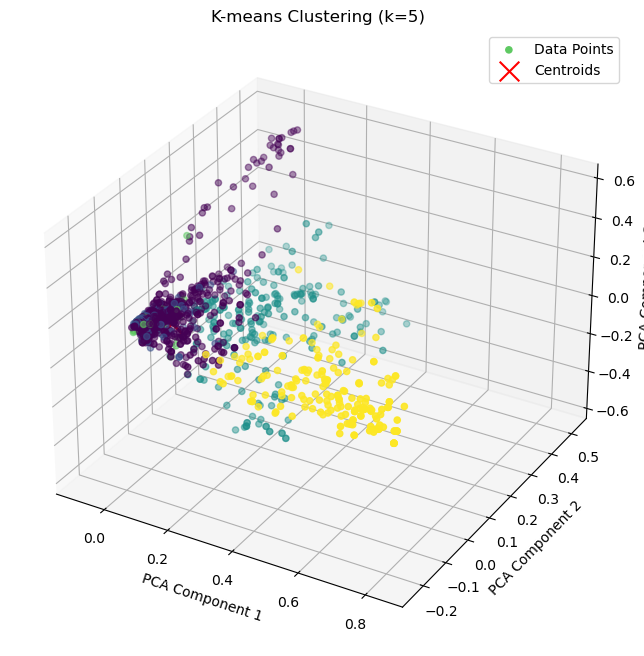

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x, y, z, clusters, and centroids are correctly defined

# Visualize clusters after k-means in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(x, y, z, c=clusters, cmap='viridis', marker='o', label='Data Points')

# Scatter plot for centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, label='Centroids')

# Set labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title(f'K-means Clustering (k={optimal_k})')

# Add legend
ax.legend()

# Show plot
plt.show()


In [26]:
# Add cluster assignments to DataFrame
df['Cluster'] = clusters

# Print DataFrame with sentiment and cluster number
df

,Sentence,Cluster
0,geosolutions technology leverage benefon gps s...,3
1,esi lows bk real possibility,0
2,last quarter componenta net sales doubled eurm...,0
3,according finnishrussian chamber commerce majo...,0
4,swedish buyout firm sold remaining percent sta...,0
...,...,...
2813,iff technical alerts stochastic sell signal dm...,0
2814,basis competitive bidding ooo kitai stroi russ...,0
2815,british american tobacco drops sues pwc pollut...,0
2816,group posted net sales mln euro mln operating ...,0


In [27]:
z=df[df['Cluster']==1]
z

,Sentence,Cluster
17,according lñnnen tehtaat ceo matti karppinen c...,1
23,company plans increase unit specialist staff s...,1
25,shire ceo steps drive get baxalta board talking,1
62,stora enso also meetings labor authorities emp...,1
68,staff recruited japan complement network close...,1
...,...,...
2775,move triggered weak demand forestry equipment ...,1
2789,measures result statutory joint negotiations e...,1
2796,recruitment related relocation stora enso rese...,1
2810,central europe important market area honka,1


In [28]:
# Filter the DataFrame to get the sentences belonging to Cluster 1
cluster_1_sentences = df[df['Cluster'] == 1]['Sentence'].tolist()

# Combine all sentences into a single string
cluster_1_combined = ' '.join(cluster_1_sentences)

# Split the combined string into words
cluster_1_words = cluster_1_combined.split()

print(cluster_1_words)




['according', 'lñnnen', 'tehtaat', 'ceo', 'matti', 'karppinen', 'company', 'aims', 'deliver', 'fish', 'products', 'customers', 'day', 'earlier', 'currently', 'company', 'plans', 'increase', 'unit', 'specialist', 'staff', 'several', 'dozen', 'depending', 'market', 'situation', 'shire', 'ceo', 'steps', 'drive', 'get', 'baxalta', 'board', 'talking', 'stora', 'enso', 'also', 'meetings', 'labor', 'authorities', 'employment', 'economic', 'development', 'centres', 'representatives', 'government', 'order', 'find', 'solutions', 'staff', 'recruited', 'japan', 'complement', 'network', 'close', 'service', 'locations', 'countries', 'worldwide', 'however', 'sales', 'returned', 'growth', 'apriljune', 'ceo', 'pekka', 'eloholma', 'said', 'changes', 'market', 'situation', 'tougher', 'price', 'competition', 'substantially', 'reduced', 'demand', 'bread', 'packaging', 'manufactured', 'kauhava', 'plant', 'according', 'company', 'testament', 'quality', 'lte', 'solution', 'commitment', 'japanese', 'market', '

In [29]:
#detailing various financial data and reports, likely from different companies.
# Count the occurrence of each word
from collections import Counter
word_freq_cluster_1 = Counter(cluster_1_words)
# Print the top 20 words by frequency
top_words_cluster_1 = word_freq_cluster_1.most_common(20)
for word, freq in top_words_cluster_1:
    print(f"{word}: {freq}")

market: 116
business: 108
company: 65
services: 54
operations: 53
ceo: 40
group: 40
said: 39
finland: 36
development: 32
finnish: 29
sales: 28
mobile: 26
nokia: 24
service: 23
share: 23
percent: 23
solutions: 20
president: 20
customers: 19


In [30]:
z2=df[df['Cluster']==2]
z2

,Sentence,Cluster
12,subdivision made sales revenues last year eur ...,2
24,company closed last year turnover four million...,2
33,profit taxes eur million,2
37,item included restructuring costs eur year ear...,2
48,company also estimates already carried investm...,2
...,...,...
2761,first quarter marktomarket result pretax profi...,2
2769,earnings per share eps amounted loss eur,2
2776,however orders received period review fell qua...,2
2782,company reported today operating loss eur net ...,2


In [31]:
# Filter the DataFrame to get the sentences belonging to Cluster 2
cluster_2_sentences = df[df['Cluster'] == 2]['Sentence'].tolist()

# Combine all sentences into a single string
cluster_2_combined = ' '.join(cluster_2_sentences)

# Split the combined string into words
cluster_2_words = cluster_2_combined.split()
print(cluster_2_words)

# Count the occurrence of each word
word_freq_cluster_2 = Counter(cluster_2_words)




['subdivision', 'made', 'sales', 'revenues', 'last', 'year', 'eur', 'million', 'eur', 'million', 'operating', 'profits', 'eur', 'million', 'eur', 'million', 'company', 'closed', 'last', 'year', 'turnover', 'four', 'million', 'euros', 'profit', 'taxes', 'eur', 'million', 'item', 'included', 'restructuring', 'costs', 'eur', 'year', 'earlier', 'eur', 'diluted', 'eps', 'stood', 'eur', 'versus', 'loss', 'per', 'share', 'eur', 'company', 'also', 'estimates', 'already', 'carried', 'investments', 'lead', 'increase', 'net', 'sales', 'reached', 'eur', 'million', 'six', 'breweries', 'recorded', 'percent', 'growth', 'domestic', 'beer', 'sales', 'last', 'year', 'million', 'liters', 'million', 'liters', 'sold', 'diluted', 'earnings', 'per', 'share', 'eps', 'fell', 'eur', 'eur', 'finnish', 'geosentric', 'net', 'sales', 'decreased', 'eur', 'januarymarch', 'operating', 'profit', 'quarter', 'apriljune', 'amounted', 'eur', 'sales', 'eur', 'bn', 'finnish', 'solutions', 'provider', 'affecto', 'oyj', 'hel',

In [32]:
# covering different aspects of business operations, industry trends, and corporate strategies.
# Print the top 20 words by frequency
top_words_cluster_2 = word_freq_cluster_2.most_common(20)
for word, freq in top_words_cluster_2:
    print(f"{word}: {freq}")

eur: 295
million: 219
net: 93
profit: 65
sales: 58
finnish: 50
quarter: 48
year: 46
per: 46
company: 45
loss: 44
said: 42
share: 41
oyj: 38
period: 38
today: 34
eps: 30
usd: 30
operating: 28
hel: 27


In [33]:
#he financial performance and activities of a company or companies.
z3=df[df['Cluster']==3]
z3

,Sentence,Cluster
0,geosolutions technology leverage benefon gps s...,3
14,ahlstrom corporation stock exchange announceme...,3
82,brazilian unit finnish security solutions prov...,3
126,tyc break new highs lots technicals looking gr...,3
144,bg group appoints new ceo one month early,3
...,...,...
2706,hobby hall sales decrease pct due implementing...,3
2735,said things different new finnish nuclear powe...,3
2757,helsinki afx salcomp mobile phone charger manu...,3
2762,aldata solution oyj stock exchange release aug...,3


In [34]:
# Filter the DataFrame to get the sentences belonging to Cluster 3
cluster_3_sentences = df[df['Cluster'] == 3]['Sentence'].tolist()

# Combine all sentences into a single string
cluster_3_combined = ' '.join(cluster_3_sentences)

# Split the combined string into words
cluster_3_words = cluster_3_combined.split()

# Count the occurrence of each word
word_freq_cluster_3 = Counter(cluster_3_words)

# Print the top 20 words by frequency
top_words_cluster_3 = word_freq_cluster_3.most_common(20)
for word, freq in top_words_cluster_3:
    print(f"{word}: {freq}")



new: 127
company: 28
shares: 23
stock: 19
subscribed: 12
option: 12
group: 11
contract: 11
rights: 9
sales: 9
said: 9
total: 8
options: 8
services: 8
technology: 7
finnish: 7
exchange: 6
year: 6
ceo: 6
subscription: 6


***********Performance measurement ----> Interacluster  distn are minimized and intercluster distance are maximaized***********

In [35]:
intercluster_distances = []
intracluster_distances = []

for k in k_values:
    clusters, centroids = kmeans(tfidf_vectors, k)
    inter_cluster_distance = np.sum((tfidf_vectors - centroids[clusters])**2)
    intra_cluster_distance = np.sum([compute_distance(point, centroids[cluster]) for point, cluster in zip(tfidf_vectors, clusters)])
    
    intercluster_distances.append(inter_cluster_distance)
    intracluster_distances.append(intra_cluster_distance)
    
    print(f"For {k} clusters: Intercluster Distance: {inter_cluster_distance}, Intracluster Distance: {intra_cluster_distance}")

# Print the final intercluster and intracluster distances
print(f"\nFinal Intercluster Distances: {intercluster_distances}")
print(f"Final Intracluster Distances: {intracluster_distances}")


For 1 clusters: Intercluster Distance: 2787.262835903742, Intracluster Distance: 2801.883250961544
For 2 clusters: Intercluster Distance: 2720.2039732021617, Intracluster Distance: 2763.0188829525187
For 3 clusters: Intercluster Distance: 2696.228772660412, Intracluster Distance: 2749.0706772649673
For 4 clusters: Intercluster Distance: 2688.0452065523614, Intracluster Distance: 2744.8485566548306
For 5 clusters: Intercluster Distance: 2683.7913557462048, Intracluster Distance: 2742.323940319114
For 6 clusters: Intercluster Distance: 2670.615893659335, Intracluster Distance: 2734.29291985843
For 7 clusters: Intercluster Distance: 2659.38616102568, Intracluster Distance: 2727.9155554942545
For 8 clusters: Intercluster Distance: 2645.6372724959333, Intracluster Distance: 2719.5219085493536
For 9 clusters: Intercluster Distance: 2654.9280547112794, Intracluster Distance: 2727.0674078877155

Final Intercluster Distances: [2787.262835903742, 2720.2039732021617, 2696.228772660412, 2688.04520

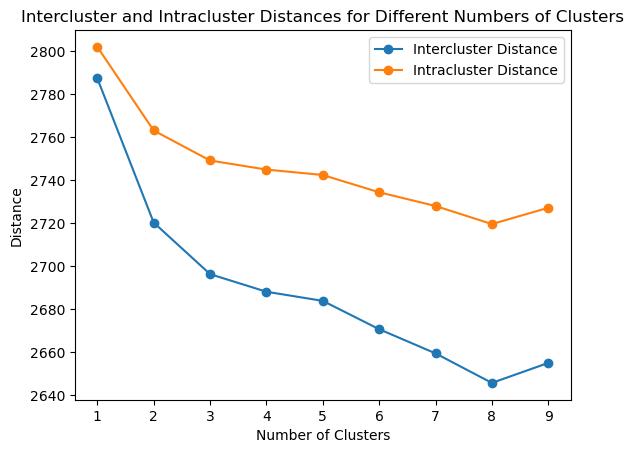

In [36]:
# Plot a graph between the number of clusters and intercluster and intracluster distances
plt.plot(k_values, intercluster_distances, marker='o', label='Intercluster Distance')
plt.plot(k_values, intracluster_distances, marker='o', label='Intracluster Distance')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('Intercluster and Intracluster Distances for Different Numbers of Clusters')
plt.legend()
plt.show()


In [37]:
# Determine the value of k for which intra-cluster distance is minimum
k_min_intra = np.argmin(intercluster_distances) + 1  # Adding 1 because index starts from 0

# Determine the value of k for which inter-cluster distance is maximum
k_max_inter = np.argmax(intercluster_distances) + 1  # Adding 1 because index starts from 0

# Print the values of k
print(f"For k={k_min_intra}, the intra-cluster distance is minimum.")
print(f"For k={k_max_inter}, the inter-cluster distance is maximum.")


For k=8, the intra-cluster distance is minimum.
For k=1, the inter-cluster distance is maximum.
